In [56]:
from IPython.display import Image

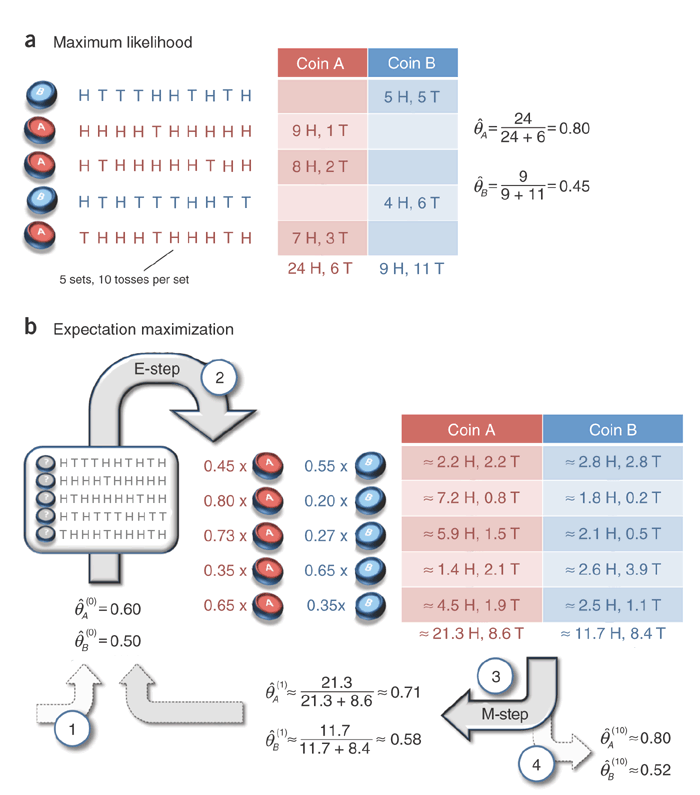

In [58]:
Image(filename='/home/wy/Desktop/mj0nb.png')

###**get_mn_log_likelihood 算法前導**

下表為血型的機率  

Type|0|A|B|AB
---|---|---|---|---
Probability|0.44|0.42|0.10|0.04

那隨機抽取10人，6O,2A,1B,1AB的機率是多少？

###**Probability mass function**

$P(X_{1}=x_{1},\cdots ,X_{k}=x_{k}) = \frac{n!}{x_{1}!\cdots x_{k}!}p_{1}^{x_{1}}\cdots p_{k}^{x_{k}}$

故  
$P(x_1=6,x_2=2,x_3=1,x_4=1)=\frac{10!}{6!2!1!1!}0.44^6\times 0.42^2\times 0.10^1\times 0.04^1$

但是實際上運算會取log來降低複雜度  
$\log P(X_{1}=x_{1},\cdots ,X_{k}=x_{k}) = \log n! - \log (x_{1}!\cdots x_{k}!)+x_1\log p_1+\cdots+x_k\log p_k$

In [59]:
import numpy as np
import math

#### E-M Coin Toss Example as given in the EM tutorial paper by Do and Batzoglou* #### 

def get_mn_log_likelihood(obs,probs):
    """ Return the (log)likelihood of obs, given the probs"""
    # Multinomial Distribution Log PMF
    # ln (pdf)      =             multinomial coeff            *   product of probabilities
    # ln[f(x|n, p)] = [ln(n!) - (ln(x1!)+ln(x2!)+...+ln(xk!))] + [x1*ln(p1)+x2*ln(p2)+...+xk*ln(pk)]     

    multinomial_coeff_denom= 0
    prod_probs = 0
    for x in range(0,len(obs)): # loop through state counts in each observation
        multinomial_coeff_denom = multinomial_coeff_denom + math.log(math.factorial(obs[x]))
        prod_probs = prod_probs + obs[x]*math.log(probs[x])

    multinomial_coeff = math.log(math.factorial(sum(obs))) -  multinomial_coeff_denom
    likelihood = multinomial_coeff + prod_probs
    return likelihood

# 1st:  Coin B, {HTTTHHTHTH}, 5H,5T
# 2nd:  Coin A, {HHHHTHHHHH}, 9H,1T
# 3rd:  Coin A, {HTHHHHHTHH}, 8H,2T
# 4th:  Coin B, {HTHTTTHHTT}, 4H,6T
# 5th:  Coin A, {THHHTHHHTH}, 7H,3T
# so, from MLE: pA(heads) = 0.80 and pB(heads)=0.45

# represent the experiments
head_counts = np.array([5,9,8,4,7])
tail_counts = 10-head_counts
experiments = zip(head_counts,tail_counts)

# 5 9 8 4 7
# 5 1 2 6 3

# initialise the pA(heads) and pB(heads)
pA_heads = np.zeros(100); pA_heads[0] = 0.60
pB_heads = np.zeros(100); pB_heads[0] = 0.50

# E-M begins!
delta = 0.001  
j = 0 # iteration counter
improvement = float('inf')
while (improvement>delta):
    expectation_A = np.zeros((5,2), dtype=float) 
    expectation_B = np.zeros((5,2), dtype=float)
    for i in range(0,len(experiments)):
        e = experiments[i] # i'th experiment
        ll_A = get_mn_log_likelihood(e,np.array([pA_heads[j],1-pA_heads[j]])) # loglikelihood of e given coin A
        ll_B = get_mn_log_likelihood(e,np.array([pB_heads[j],1-pB_heads[j]])) # loglikelihood of e given coin B
        weightA = math.exp(ll_A) / ( math.exp(ll_A) + math.exp(ll_B) ) # corresponding weight of A proportional to likelihood of A 
        weightB = math.exp(ll_B) / ( math.exp(ll_A) + math.exp(ll_B) ) # corresponding weight of B proportional to likelihood of B                            
        expectation_A[i] = np.dot(weightA, e)
        expectation_B[i] = np.dot(weightB, e)

    pA_heads[j+1] = sum(expectation_A)[0] / sum(sum(expectation_A)); 
    pB_heads[j+1] = sum(expectation_B)[0] / sum(sum(expectation_B)); 

    improvement = max( abs(np.array([pA_heads[j+1],pB_heads[j+1]]) - np.array([pA_heads[j],pB_heads[j]]) ))
    j = j+1

In [60]:
pA_heads

array([ 0.6       ,  0.71301224,  0.74529204,  0.76809883,  0.78316458,
        0.79105525,  0.79453254,  0.79592867,  0.79646564,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [61]:
pB_heads

array([ 0.5       ,  0.58133931,  0.56925575,  0.54953591,  0.53461745,
        0.52628117,  0.52239044,  0.52072988,  0.52004719,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

###Reference
[how does expectation maximization work?](http://math.stackexchange.com/questions/25111/how-does-expectation-maximization-work
)  
[Introduction to the Multinomial Distribution](https://www.youtube.com/watch?v=syVW7DgvUaY)